เราจะมาเริ่มต้นจากการดึงข้อมูล Chevron กัน และข้อมูลราคาน้ำมันกัน

In [ ]:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start = '2016-01-01'
end = '2021-04-01'

In [ ]:
oil_price = web.get_data_yahoo('CL=F', start=start, end=end)

In [ ]:
cvx = web.get_data_yahoo('CVX', start=start, end=end)

In [ ]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1309 entries, 2016-01-04 to 2021-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1309 non-null   float64
 1   Low        1309 non-null   float64
 2   Open       1309 non-null   float64
 3   Close      1309 non-null   float64
 4   Volume     1309 non-null   float64
 5   Adj Close  1309 non-null   float64
dtypes: float64(6)
memory usage: 71.6 KB


In [ ]:
oil_price 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,38.389999,36.330002,37.599998,36.759998,431985.0,36.759998
2016-01-05,37.099998,35.740002,36.900002,35.970001,410131.0,35.970001
2016-01-06,36.389999,33.770000,36.180000,33.970001,563811.0,33.970001
2016-01-07,34.259998,32.099998,34.090000,33.270000,617409.0,33.270000
2016-01-08,34.340000,32.639999,33.299999,33.160000,596496.0,33.160000
...,...,...,...,...,...,...
2021-03-26,61.360001,58.320000,58.480000,60.970001,471996.0,60.970001
2021-03-29,61.770000,59.410000,60.930000,61.560001,449360.0,61.560001
2021-03-30,62.270000,59.939999,61.959999,60.549999,388188.0,60.549999


มา Plot ดูซิ 

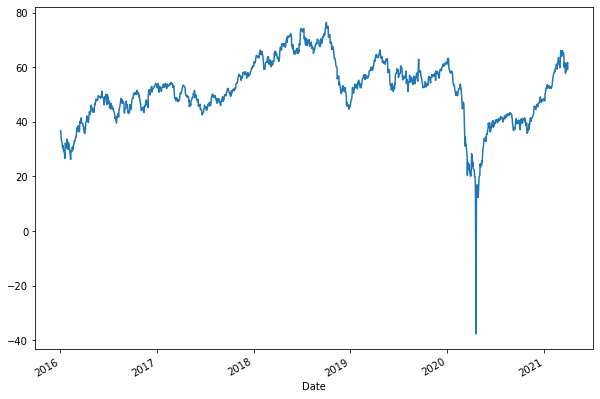

In [ ]:
oil_price['Adj Close'].plot(figsize=(10,7))

คราวนี้มาหา Return ต่อ เดี๋ยวต้องเอาไปใช้ต่อ

In [ ]:
ret = oil_price['Adj Close']/oil_price['Adj Close'].shift(1) - 1
#ตรงนี้จะใช้ .pct_change() ก็ได้นะ

คราวนี้ก็จะอยู่ที่ data ว่ามา clean แค่ไหน ติดเสาร์อาทิตย์ และวันหยุดตลาดหลักทรัพย์หรือไม่ ถ้ามีติดก็ ต้องดูในรายละเอียด ว่าติดเป็น 0 หรือ NaN, Null หรือราคาค้างเติ่ง

In [ ]:
ret.head(20)

Date
2016-01-05   -0.021491
2016-01-06   -0.055602
2016-01-07   -0.020606
2016-01-08   -0.003306
2016-01-11   -0.052774
2016-01-12   -0.030882
2016-01-13    0.001314
2016-01-14    0.023622
2016-01-15   -0.057051
2016-01-19   -0.032631
2016-01-20   -0.067112
2016-01-21    0.112241
2016-01-22    0.090078
2016-01-25   -0.057471
2016-01-26    0.036585
2016-01-27    0.027027
2016-01-28    0.028483
2016-01-29    0.012041
2016-02-01   -0.059488
2016-02-02   -0.055029
Name: Adj Close, dtype: float64

เรียกดูข้อมูลกันหน่อยซิ อื้ม มีเว้นวันหยุดไปให้ทั้งเสาร์อาทิตย์และวันตลาดปิด แต่เผื่อไว้ก่อน อาจจะมีอะไรที่เราไม่เห็น ลองเช็ค nan ดู

In [ ]:
#check nan
ret.isnull().values.any()

False

กรณีมี nan เรามีสองตัวเลือก drop หรือ fill ไว้ค่อยว่ากัน

เอามา Plot จะเห็นเลยว่าไม่เป็น Normal Distribution จะเห็นตัว Outlier 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 8.000e+01, 1.139e+03, 7.100e+01, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00]),
 array([-3.05966065, -2.99093497, -2.92220929, -2.85348361, -2.78475794,
        -2.71603226, -2.64730658, -2.5785809 , -2.50985522, -2.44112954,
        -2.37240386, -2.30367818, -2.2349525 , -2.16622682, -2.09750114,
        -2.02877546, -1.96004978, -1.8913241 , -1.82259842, -1.75387274,
        -1.68514706, -1.61642138, -1.54769571, -1.47897003, -1.41024435,
        -1.

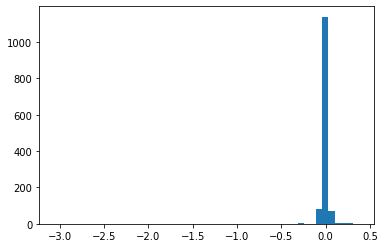

In [ ]:
plt.hist(ret, bins=50)

ก็จะค้นพบว่าดูไม่รู้เรื่องเลย มันมีหลุดไป -3 หมายความว่าอย่างไรกันนะ? เป็น error จาก data หรือ มันเกิดขึ้นจริงๆ แต่จากรูปเราก็เห็นๆกันอยู่ว่ามันมีช่วงน้ำมันติดลบนี่เนอะ

และที่จะทำให้เห็นได้ชัดเลยคือ Boxplot ทำลายทุกความสวยงามที่คุณเห็นใน tutorial ต่างๆ และนี่แหละครับคือ data ที่คุณต้องเจอในชีวิตจริง เราจะเก็บมันไว้ก่อน ก่อนจะจัดการกับ outlier แสนโหดร้ายนี้

Text(0.5, 1.0, 'Boxplot of US Oil Price ')

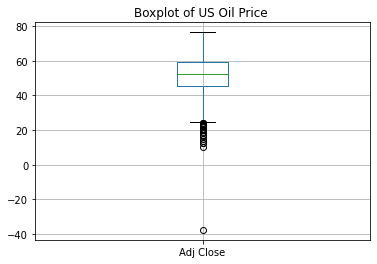

In [ ]:
oil_price.boxplot(column = 'Adj Close')
plt.title('Boxplot of US Oil Price ')

หลังจากที่ plot มาก็จะเห็นเลยว่า Outlier ยังไม่ได้ตัดเลยยย ถ้าเอาไปเข้า Model เละแน่ ดังนั้นเดี๋ยวจะหาจังหวะมาจัดการกับ Outlier กันทีหลัง แต่ตอนนี้เก็บไว้ก่อน เพราะเดี๋ยวต้องไปรวม dataframe (เรียกว่ารวมตารางละกัน)

ก่อนขยับขยายไปที่อื่น เราซูมดูกันหน่อยไหม ลองดูช่วงผลตอบแทน -30% ถึง 30% มันก็ดูจะเป็นการเคลื่อนไหวของราคาที่ควรจะเป็นหน่อย แน่นอนยังมี effect ของ roll yield มากวนอยู่ แต่ทำไงได้ล่ะ นี่คอร์สมือใหม่นี่เนอะ ก็ปล่อยไว้ก่อน



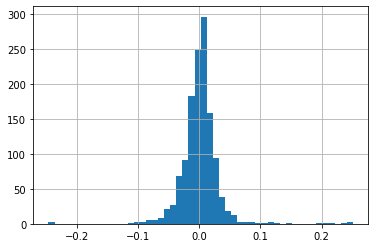

In [ ]:
ret[(ret>-0.3) & (ret<0.3)].hist(bins=50)
#โอเคค่อยเป็นมนุษย์มนาหน่อย